# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data
data_loc = os.path.join("C:"+os.sep,"Users","dbur","Desktop","udacity","traffic-signs-data")
training_file = os.path.join(data_loc,"train.p")
testing_file = os.path.join(data_loc,"test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
print(train.keys())
print('labels:')
print(train['labels'][:5])
print('sizes:')
print(train['sizes'][:5])
print('coord:')
print(train['coords'][:5])
print('features:')
print(train['features'][:1])
print(train['features'][:1].shape)


dict_keys(['features', 'sizes', 'labels', 'coords'])
labels:
[0 0 0 0 0]
sizes:
[[29 30]
 [30 30]
 [30 30]
 [31 31]
 [30 32]]
coord:
[[ 5  6 24 25]
 [ 5  5 25 25]
 [ 5  5 25 25]
 [ 5  5 26 26]
 [ 5  6 25 26]]
features:
[[[[ 75  78  80]
   [ 74  76  78]
   [ 83  84  83]
   ..., 
   [ 67  74  73]
   [ 65  69  68]
   [ 66  67  66]]

  [[ 82  83  85]
   [ 80  80  82]
   [ 87  86  83]
   ..., 
   [ 73  77  77]
   [ 75  77  75]
   [ 79  79  77]]

  [[ 79  79  81]
   [ 84  83  85]
   [ 91  88  89]
   ..., 
   [ 72  74  72]
   [ 74  75  71]
   [ 78  78  74]]

  ..., 
  [[126 128 133]
   [118 123 128]
   [108 117 120]
   ..., 
   [ 96  96  90]
   [ 99 101  94]
   [ 99 103  99]]

  [[ 90  94  98]
   [ 91  97 103]
   [ 77  87  92]
   ..., 
   [104 104  97]
   [107 111 102]
   [ 95 103  97]]

  [[ 85  84  87]
   [ 93  99 104]
   [ 69  80  85]
   ..., 
   [101 102  94]
   [ 98 101  90]
   [ 90  97  89]]]]
(1, 32, 32, 3)


In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['sizes'][0]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [29 30]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

[  210.  2220.  2250.  1410.  1980.  1860.   420.  1440.  1410.  1470.
  2010.  1320.  2100.  2160.   780.   630.   420.  1110.  1200.   210.
   360.   330.   390.   510.   270.  1500.   600.   240.   540.   270.
   450.   780.   240.   689.   420.  1200.   390.   210.  2070.   300.
   360.   480.]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.]


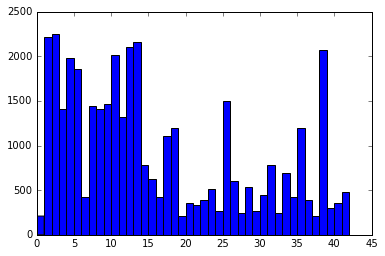

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
fig, ax = plt.subplots()
n, bins, patches = ax.hist(train['labels'], len(set(train['labels']))-1)
print(n)
print(bins)
plt.show()




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(39209, 32, 32, 3)
[[38 37 41 ..., 28 29 26]
 [50 40 39 ..., 31 28 28]
 [45 41 36 ..., 33 30 30]
 ..., 
 [22 26 25 ..., 27 25 23]
 [27 26 27 ..., 26 26 24]
 [26 24 27 ..., 25 27 23]]
uint8
test sample shape:
label: 12
(32, 32, 3)
new shape:
(39209, 32, 32, 3)


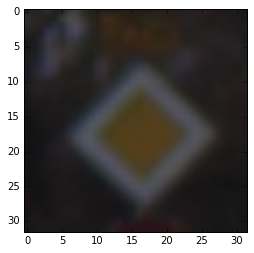

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print(X_train.shape)
print(X_train[0,:,:,0])
print(X_train.dtype)
# X_train = X_train.astype(np.float32)
# X_train[:,:,:,0] = X_train[:,:,:,0] / 255.0
# X_train[:,:,:,1] = X_train[:,:,:,1] / 255.0
# X_train[:,:,:,2] = X_train[:,:,:,2] / 255.0
print('test sample shape:')
test_sample = X_train[0].astype('uint8')
print('label: '+str(y_train[0]))
print(test_sample.shape)
from PIL import Image
from matplotlib.pyplot import imshow
im = Image.fromarray(test_sample)
imshow(im)

# test_sample_g = test_sample[:,:,0] / 3 + test_sample[:,:,1] / 3 + test_sample[:,:,2] / 3
# im_g = Image.fromarray(test_sample_g)
# imshow(im_g)

# X_train = X_train[:,:,:,0]/ 3 + X_train[:,:,:,1]/ 3 + X_train[:,:,:,2]/ 3
# X_train = np.expand_dims(X_train,axis=3)
print('new shape:')
print(X_train.shape)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
Initially: Greyscale. To reduce dimensionality, anticipating that it will help performance.
Removed this on a second attempt.

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

# tv_split = int(X_train.shape[0] * 0.7)
# print(tv_split)
# X_train_set = X_train[:tv_split]
# y_train_set = y_train[:tv_split]
# X_validation = X_train[tv_split:]
# y_validation = y_train[tv_split:]


X_train_set, X_validation, y_train_set, y_validation = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

print(X_train.shape,y_train.shape)
print(X_train_set.shape,y_train_set.shape)
print(X_validation.shape,y_validation.shape)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (31367,)
(7842, 32, 32, 3) (7842,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Shuffle the data. 70% of the data will be used for training, 30% will be used for validation. Test set is untouched.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten


def tsc_nn(x):
    # input   ->  conv   -> pool  -> conv   -> pool   -> fc -> softmax
    # 32x32x1 -> 28x28x6 -> 14x14x6 -> 10x10x16 -> 5x5x16 -> 400x1 -> 120x1 -> 84x1 -> 43x1
    mu = 0
    sigma = 0.1
    #c1
    c1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    c1_b = tf.Variable(tf.zeros(6))
    c1 = tf.nn.conv2d(x,c1_W,strides=[1,1,1,1],padding='VALID') + c1_b
    c1 = tf.nn.relu(c1)

    #p1
    p1 = tf.nn.max_pool(c1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    #c2
    c2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    c2_b = tf.Variable(tf.zeros(16))
    c2 = tf.nn.conv2d(p1,c2_W,strides=[1,1,1,1],padding='VALID') + c2_b
    c2 = tf.nn.relu(c2)

    #p2
    p2 = tf.nn.max_pool(c2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    #fc
    p2 = flatten(p2)
    fc_W = tf.Variable(tf.truncated_normal(shape=(400,120),mean=mu,stddev=sigma))
    fc_b = tf.Variable(tf.zeros(120))
    fc = tf.matmul(p2,fc_W)+fc_b
    
    fc = tf.nn.relu(fc)
    
    #fc2
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc,fc2_W)+fc2_b
    
    fc2 = tf.nn.relu(fc2)
    
    #fc3
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc_final = tf.matmul(fc2,fc3_W)+fc3_b

    #sm
    return fc_final 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32,(None,32,32,3))
y = tf.placeholder(tf.int32,(None))
onehot_labels = tf.one_hot(y,43)

learning_rate=0.001

logits = tsc_nn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=onehot_labels)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

EPOCHS = 14
BATCH_SIZE = 128

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(onehot_labels, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
    

        


In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_set)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_t, y_t = shuffle(X_train_set, y_train_set)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_t[offset:end], y_t[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        training_accuracy = evaluate(X_t,y_t)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, '.\\tscnn')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.724
Validation Accuracy = 0.716

EPOCH 2 ...
Training Accuracy = 0.866
Validation Accuracy = 0.839

EPOCH 3 ...
Training Accuracy = 0.913
Validation Accuracy = 0.886

EPOCH 4 ...
Training Accuracy = 0.945
Validation Accuracy = 0.914

EPOCH 5 ...
Training Accuracy = 0.948
Validation Accuracy = 0.917

EPOCH 6 ...
Training Accuracy = 0.969
Validation Accuracy = 0.941

EPOCH 7 ...
Training Accuracy = 0.963
Validation Accuracy = 0.929

EPOCH 8 ...
Training Accuracy = 0.971
Validation Accuracy = 0.939

EPOCH 9 ...
Training Accuracy = 0.978
Validation Accuracy = 0.948

EPOCH 10 ...
Training Accuracy = 0.978
Validation Accuracy = 0.951

EPOCH 11 ...
Training Accuracy = 0.976
Validation Accuracy = 0.944

EPOCH 12 ...
Training Accuracy = 0.983
Validation Accuracy = 0.952

EPOCH 13 ...
Training Accuracy = 0.985
Validation Accuracy = 0.957

EPOCH 14 ...
Training Accuracy = 0.982
Validation Accuracy = 0.956

EPOCH 15 ...
Training Accuracy = 0.964
Valid

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Tinkered with LeNet5 architecture. Found that 15 batch sizes reaches a high point for validation accuracy while training accuracy remains pretty much steady after that point. Initially did not have mu, sigma set, so tf was using default 0 and 1, which caused my model to reach only 70% sometimes, and other times it would start at 10% and reduce accuracy with each epoch. Fixing the sigma to 0.1 increased accuracy a lot.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Starting with LeNet!
First, attempted greyscale preprocessing. Validation accurace was below 5%.
Next, changed the NN to use the 3 color channels instead of an averaged greyscale. This was not helping. Then found out the hyperparameters for truncated_normal have the model perform much better when sigma is not the default.

In [39]:
# Test model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.851


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

[31 12 14 14 12]


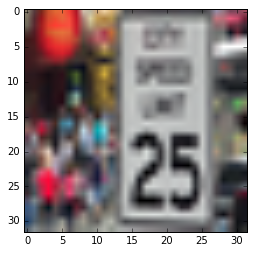

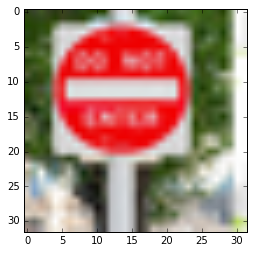

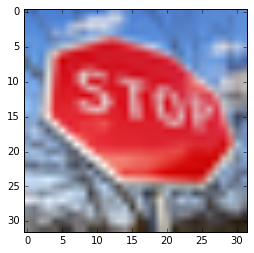

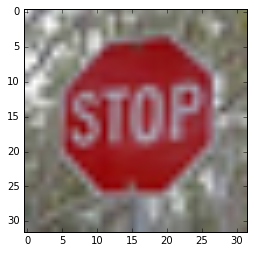

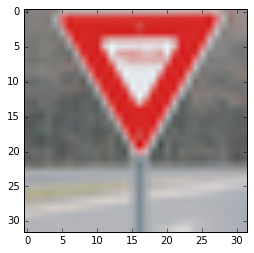

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import tensorflow as tf

plt.figure()
img=Image.open('./traffic_signs_from_web/25mph.jpg')
img = img.resize((32, 32),Image.ANTIALIAS)
imshow(img)
i=np.zeros((5,32,32,3)).astype('uint8')
i[0,:,:,:] = img
# plt.figure()
# img=Image.open('./traffic_signs_from_web/carriagecrossing.jpg')
# img = img.resize((32, 32),Image.ANTIALIAS)
# imshow(img)
# i[1,:,:,:] = img
plt.figure()
img=Image.open('./traffic_signs_from_web/donotenter.jpg')
img = img.resize((32, 32),Image.ANTIALIAS)
imshow(img)
i[1,:,:,:] = img
plt.figure()
# img=Image.open('./traffic_signs_from_web/oneway.jpg')
# img = img.resize((32, 32),Image.ANTIALIAS)
# imshow(img)
# i[3,:,:,:] = img
plt.figure()
img=Image.open('./traffic_signs_from_web/stop.jpg')
img = img.resize((32, 32),Image.ANTIALIAS)
imshow(img)
i[2,:,:,:] = img
plt.figure()
img=Image.open('./traffic_signs_from_web/clearstop.jpg')
img = img.resize((32, 32),Image.ANTIALIAS)
imshow(img)
i[3,:,:,:] = img
plt.figure()
img=Image.open('./traffic_signs_from_web/yield.jpg')
img = img.resize((32, 32),Image.ANTIALIAS)
imshow(img)
i[4,:,:,:] = img


prediction=tf.argmax(logits,1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(prediction.eval(feed_dict={x:i}))
    
# [31 12 14 14 12]
# 31,Wild animals crossing
# 13,Yield
# 12,Priority road
# 14,Stop


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
1 - 25 MPH Sign

2 - Do Not Enter

3 - Stop

4 - Stop

5 - Yield


I do not believe 25 mph is a choice in the categories provided, so it was interesting to see the attempt to classify that. The classifier was able to properly predict stop signs even though the angles were different.

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

prediction=tf.argmax(logits,1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(prediction.eval(feed_dict={x:i}))

[31 12 14 14 12]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** On the internet sourced signs, it got 40% accuracy - only the two stop signs. On the test set, the model acheived 85.1% accuracy.

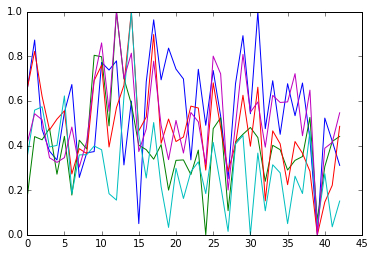

In [27]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmaxes = logits.eval(feed_dict={x:i})
for img_pred_probs in softmaxes:
    img_pred_probs = (img_pred_probs - np.min(img_pred_probs)) / (np.max(img_pred_probs)-np.min(img_pred_probs))
    plt.plot(img_pred_probs)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [38]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #normalize
    softmaxes = (softmaxes - np.min(softmaxes)) / (np.max(softmaxes)-np.min(softmaxes))
    top_three = sess.run(tf.nn.top_k(tf.constant(softmaxes), k=3))
    print(top_three)

TopKV2(values=array([[ 0.65024042,  0.63774216,  0.61365664],
       [ 1.        ,  0.80417567,  0.7976777 ],
       [ 0.78282779,  0.72353321,  0.67996711],
       [ 0.81637698,  0.64457238,  0.64244443],
       [ 0.70332611,  0.65327954,  0.63682443]], dtype=float32), indices=array([[31, 17, 29],
       [12,  9, 10],
       [14, 17,  1],
       [14,  5, 13],
       [12, 10, 14]]))


**Answer:**
31 17 29 - 25 MPH  
Wild animals crossing, No entry, Bicycles crossing

12 9 10 - Do not enter  
Priority road, No passing, No passing for vehicles over 3.5 metric tons

14 17 1 - Stop  
Stop, No entry, Speed limit (30km/h)

14 5 13 - Stop  
Stop, Speed limit (80km/h), Yield

12 10 14 - Yield  
Priority road, No passing for vehicles over 3.5 metric tons, Stop

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.